# 图像的基本属性
这里我们加载了一张BGR通道的彩色图像并将其存储在变量image中，使用type()方法得到cv.imread()方法加载图像会存储为numpy对象。可通过numpy对象的size、shape、dtype属性得到图像的像素、形状、数据类型。其中形状反映了图像的行、列、通道数。

In [1]:
import cv2 as cv
image = cv.imread("./exp_images/Tricolor.jpg",1)
print(type(image))
print("图像的像素为:%d"%image.size)
print("图像的形状为:%s"%str(image.shape))
print("图像的数据类型为:%s"%image.dtype)

<class 'numpy.ndarray'>
图像的像素为:3072000
图像的形状为:(800, 1280, 3)
图像的数据类型为:uint8


# 图像通道
图像通道是指把数字图像按照颜色成分划分成不同的图像，主要有单通道图像、三通道图像、四通道图像，各通道图像之间可以进行转换。

![](images/2023-08-11-15-05-32.png)

- 单通道图像指每个像素点只用一个数值来表示，即只可以表示灰度，0 表示黑色，1 或 255 表示白色。
- 三通道图像是指图像的 RGB（红绿蓝）模式，即每个像素点用红绿蓝三个数值来表示的彩色图像，全 0 表示黑色，全 255 表示白色，三个值都一样则表示灰色。
- 四通道图像是在 RGB模式的基础上加入了 Alpha（透明度），若 Alpha=0 则表示全透明。

## 图像通道拆分合并
OpenCV加载、显示彩色图片默认是BGR格式的。有时候需要分别处理图像的B、G、R通道。在这种情况下，需要将BGR图像拆分为单个通道，再将这些单独的通道组合成RGB图片。可以通过以下方式简单的做到这一点：

In [2]:
import cv2 as cv

img = cv.imread('./exp_images/Tricolor.jpg',1)
b,g,r = cv.split(img)
img_rgb = cv.merge((r,g,b))

使用matplotlib显示rgb通道图像。

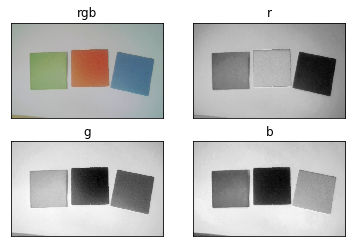

In [3]:
import matplotlib.pyplot as plt
plt.subplot(221),plt.imshow(img_rgb),plt.title("rgb")
plt.xticks([]),plt.yticks([])
plt.subplot(222),plt.imshow(r, cmap='gray'),plt.title("r")
plt.xticks([]),plt.yticks([])
plt.subplot(223),plt.imshow(g, cmap='gray'),plt.title("g")
plt.xticks([]),plt.yticks([])
plt.subplot(224),plt.imshow(b, cmap='gray'),plt.title("b")
plt.xticks([]),plt.yticks([])
plt.show()

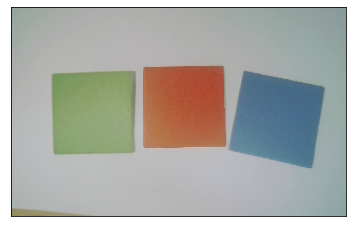

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt

b = img[:, :, 0]
g = img[:, :, 1]
r = img[:, :, 2]

img_rgb = cv.merge((r,g,b))


plt.imshow(img_rgb)
plt.xticks([]),plt.yticks([])
plt.show()

也可将其中R（红色）通道中的像素值都设置为0。

In [5]:
img_copy = img.copy()
img_copy[:, :, 2] = 0

cv.imshow("image", img_copy)
cv.waitKey(0)
cv.destroyAllWindows()